# Programando Práctica #1 "flores" el perceptron simple

In [1]:
import pandas as pd
import numpy as np

from tensorflow import keras

In [2]:
#Leer el archivo
df = pd.read_csv("flores.csv")
df.head(5)

,Alto,Ancho,Targets
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [3]:
#Separar variables de los objetivos Altos y Ancho, objetivos valores 0 y 1 de la (última columna)
x=df.iloc[:, :2].values
y=df.iloc[:, -1].values
print(x.shape, len(y))

(100, 2) 100


In [4]:
#Dividir conjunto de datos 1. Probar y 2. Entrenar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 41)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80, 2) (80,)
(20, 2) (20,)


In [5]:
#Crear el (M O D E L O) PERCEPTRON SIMPLE
model = keras.Sequential([
    keras.layers.Dense (1, activation = "tanh", input_shape=(2,)) #sigmoid, relu, tanh Funciones de activacion. ("sigmoid" ES PARA UNA MEJOR CLASIFICACION BINARIA)
])
print(model.summary())

model.compile(loss = keras.losses.BinaryCrossentropy(),optimizer = keras.optimizers.SGD(), metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
#Entrenar el modelo.
history = model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
3/3 [==============================] - 1s 7ms/step - loss: 2.7231 - accuracy: 0.5125
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 1.6713 - accuracy: 0.5125
Epoch 3/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7722 - accuracy: 0.5375
Epoch 4/20
3/3 [==============================] - 0s 3ms/step - loss: 0.2416 - accuracy: 0.9125
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.1314 - accuracy: 0.9875
Epoch 6/20
3/3 [==============================] - 0s 3ms/step - loss: 0.1183 - accuracy: 0.9875
Epoch 7/20
3/3 [==============================] - 0s 3ms/step - loss: 0.1173 - accuracy: 0.9875
Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9875
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9875
Epoch 10/20
3/3 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9875
Epoch 11/20
3/3 [======================

In [7]:
#Ver los resultados
print(model.evaluate(X_test, y_test))

1/1 [==============================] - 0s 224ms/step - loss: 0.0668 - accuracy: 1.0000
[0.06683899462223053, 1.0]


In [8]:
#Evaluar el modelo y ver su presición y saber si es confiable.
sample = X_test[4, :]
prediction = model.predict(np.expand_dims(sample,axis=0))

prediction = 0 if prediction<=0.5 else 1

print(prediction)


1/1 [==============================] - 0s 105ms/step
1


In [9]:
print(y_test [4]== prediction)

True


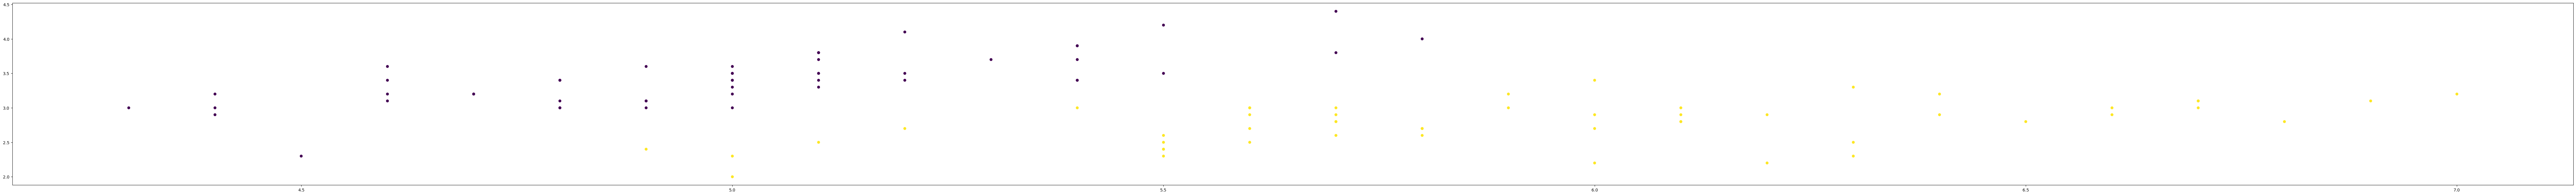

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=[112,8])
plt.scatter(df.iloc[:,0].values,df.iloc[:,1].values,
            c= df.iloc[:,-1].values)
plt.show()

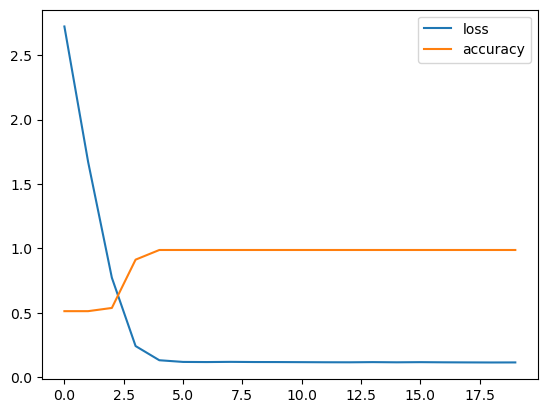

In [11]:
values=pd.DataFrame(history.history)
values.plot()
plt.show()

In [12]:
#relu, tangente hyperbolica